In [1]:
import glob
import nltk
import spacy
import os
import string
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'./dataset')  #don't remove r and give extra space
myFiles = glob.glob('*.txt')
# print(myFiles)  #prints text file names

In [3]:
dict_words={}

# TOKENIZING THE CORPUS

In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

for filename in myFiles:
    # print(filename)
    file = open(filename, 'rt', encoding="utf8")
    text = file.read()
    # split into words
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word 
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    words = list(set(words))
    dict_words[filename] = words
    words = []
    file.close()

print(len(dict_words))

486


## IMPORTING REQUIREMENTS FOR FURTHER STEPS

In [5]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

np.random.seed(500)

In [6]:
lemmatizer = WordNetLemmatizer()

from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None


def lemmatize(text):
    p = pos_tag(word_tokenize(text))
    lemma = []
    for i in range(len(p)):
        pt = get_wordnet_pos(p[i][1])
        if pt == None:
            lemma.append(lemmatizer.lemmatize(p[i][0]))
        else:
            lemma.append(lemmatizer.lemmatize(p[i][0], pt))
    return ' '.join(lemma)

# CYBER SECURITY DICTIONARY

In [7]:
# Define dictionary with related to cyber security and digital forensic domains.
all_terms = ['access control', 'anti-virus', 'anti-malware', 'antivirus software', 'apt', 'advanced persistent threat', 'asset', 
            'authentication', 'authorization', 'backing up', 'bcp', 'business continuity planning', 'behavior monitoring',
            'blacklist', 'block cipher', 'botnet', 'bug', 'byod', 'bring your own device', 'ciphertext', 'clickjacking', 'cloud computing',
            'cnd', 'computer network defense', 'cracker', 'critical infrastructure', 'cve', 'common vulnerabilities and exposures',
            'cryptography', 'cyberattack', 'cyber ecosystem', 'cyberespionage', 'cybersecurity', 'cyber teams', 'data breach',
            'data integrity', 'data mining', 'data theft', 'ddos attack', 'distributed denial of service attack', 'decrypt',
            'digital certificate', 'digital forensics', 'dlp', 'data loss prevention', 'dmz', 'demilitarized zone', 'dos',
            'denial of service', 'drive-by download', 'eavesdropping', 'encode', 'encryption key', 'firewall', 'hacker', 'hacktivism',
            'honeypot', 'iaas', 'infrastructure-as-a-service', 'identity cloning', 'identity fraud', 'ids', 'intrusion detection system',
            'information security policy', 'insider threat', 'ips', 'intrusion prevention system', 'isp', 'internet service provider',
            'jboh', 'javascript-binding-over-http', 'keylogger', 'lan', 'local area network', 'link jacking', 'malware', 'malicious software',
            'outsider threat', 'outsourcing', 'owasp', 'open web application security project', 'paas', 'platform-as-a-service',
            'packet sniffing', 'patch', 'patch management', 'payment card skimmers', 'pen testing', 'phishing', 'pki', 'public key infrastructure',
            'pos intrusions', 'point of sale intrusions', 'ransomware', 'restore', 'risk assessment', 'risk management', 'saas',
            'software-as-a-service', 'sandboxing', 'scada', 'supervisory control and data acquisition', 'security control',
            'security perimeter', 'siem', 'security information and event management', 'sniffing', 'social engineering', 'spam',
            'spear phishing', 'spoof', 'spoofing', 'spyware', 'supply chain', 'threat assessment', 'trojan horse', 'trojan',
            'two-factor authentication', 'two-step authentication', 'unauthorized access', 'vpn', 'virtual private network',
            'virus', 'vishing', 'vulnerability', 'whitelist', 'wi-fi', 'worm', 'zombie']

all_terms = [lemmatize(term) for term in all_terms]

# for i in range(len(all_terms)):
#     print(i, ": ", all_terms[i], " | ", all_terms2[i])
    
all_terms[47] = 'dos'
all_terms[57] = 'iaas'
all_terms[61] = 'ids'
all_terms[65] = 'ips'

In [8]:
# Performing dictionary look up on the sentences stored in the dataset containing terms defined in our dictionary.
def process_review(review):
    processed_token = []
    for token in review.split():
        token = ''.join(e.lower() for e in token if e.isalnum())
        processed_token.append(token)
    return ' '.join(processed_token)

def find_terms(text):
    terms = []
    review = process_review(text)
    for term in all_terms:
          if term in text:
            terms.append(term) 
    return terms

# PREPROCESSING THE CORPUS

In [9]:
preproc = {}

for fil,ls in dict_words.items():
    text = ' '.join(ls)
    preproc[fil] = lemmatize(text)

In [10]:
corpus = pd.DataFrame.from_dict(preproc, orient = 'index')
corpus.reset_index(level = 0, inplace = True)
corpus.columns = ['File', 'TokensLemmas']
corpus['LookUpCBS'] = corpus['TokensLemmas'].apply(find_terms)
# df1 = corpus[corpus.isna().any(axis=1)]
# df1
# corpus.dropna(inplace = True)
corpus

,File,TokensLemmas,LookUpCBS
0,018-armeniacancountrussiaanymo.txt,partnership beyond take russia specifically co...,[lan]
1,260-turkeyredlinefreespeechcen.txt,path move still akin picture gulen akit zero p...,[lan]
2,107-guardianviewontalksangelamerke.txt,move still middleweight putin raise careful de...,[isp]
3,205-popefrancissalmanrushdiechar.txt,pause highly prosecute terribly yell world bey...,"[lan, virus, vulnerability]"
4,013-anxiousbritainsuccourtvleadere.txt,human incomes world ever beyond attack kind sp...,"[ids, isp, lan]"
...,...,...,...
481,131-itgoinggetworsefrenchmuslims.txt,path team police taste opportunity shift world...,"[ips, lan]"
482,055-ciainterrogationsreportfeinste.txt,disagree team party justice reveal attack reig...,"[apt, ips]"
483,132-itnottimedismantlecia.txt,harry significance mcgovern favour disturbed t...,[lan]
484,242-sonynorthkoreaandinterviewwhen.txt,human basic regal world mass christian cinema ...,"[ids, isp, lan]"


In [11]:
match_lens = []

for i in range(len(corpus)):
    match_lens.append(len(corpus.loc[i,'LookUpCBS']))

corpus['No. of matches'] = match_lens
corpus

,File,TokensLemmas,LookUpCBS,No. of matches
0,018-armeniacancountrussiaanymo.txt,partnership beyond take russia specifically co...,[lan],1
1,260-turkeyredlinefreespeechcen.txt,path move still akin picture gulen akit zero p...,[lan],1
2,107-guardianviewontalksangelamerke.txt,move still middleweight putin raise careful de...,[isp],1
3,205-popefrancissalmanrushdiechar.txt,pause highly prosecute terribly yell world bey...,"[lan, virus, vulnerability]",3
4,013-anxiousbritainsuccourtvleadere.txt,human incomes world ever beyond attack kind sp...,"[ids, isp, lan]",3
...,...,...,...,...
481,131-itgoinggetworsefrenchmuslims.txt,path team police taste opportunity shift world...,"[ips, lan]",2
482,055-ciainterrogationsreportfeinste.txt,disagree team party justice reveal attack reig...,"[apt, ips]",2
483,132-itnottimedismantlecia.txt,harry significance mcgovern favour disturbed t...,[lan],1
484,242-sonynorthkoreaandinterviewwhen.txt,human basic regal world mass christian cinema ...,"[ids, isp, lan]",3


In [12]:
corpus['No. of matches'].value_counts()

1     136
2     106
0      44
3      43
4      35
6      24
5      21
7      20
8      14
9       8
11      6
10      6
13      5
12      3
14      3
16      2
20      2
22      2
17      2
18      1
15      1
30      1
24      1
Name: No. of matches, dtype: int64

In [13]:
def file_type(matches):
    if len(matches) <= 3:
        return 0 # not related to cyber security
    else:
        return 1 # related to cyber security
    
corpus['FileType'] = corpus['LookUpCBS'].apply(file_type)
corpus

,File,TokensLemmas,LookUpCBS,No. of matches,FileType
0,018-armeniacancountrussiaanymo.txt,partnership beyond take russia specifically co...,[lan],1,0
1,260-turkeyredlinefreespeechcen.txt,path move still akin picture gulen akit zero p...,[lan],1,0
2,107-guardianviewontalksangelamerke.txt,move still middleweight putin raise careful de...,[isp],1,0
3,205-popefrancissalmanrushdiechar.txt,pause highly prosecute terribly yell world bey...,"[lan, virus, vulnerability]",3,0
4,013-anxiousbritainsuccourtvleadere.txt,human incomes world ever beyond attack kind sp...,"[ids, isp, lan]",3,0
...,...,...,...,...,...
481,131-itgoinggetworsefrenchmuslims.txt,path team police taste opportunity shift world...,"[ips, lan]",2,0
482,055-ciainterrogationsreportfeinste.txt,disagree team party justice reveal attack reig...,"[apt, ips]",2,0
483,132-itnottimedismantlecia.txt,harry significance mcgovern favour disturbed t...,[lan],1,0
484,242-sonynorthkoreaandinterviewwhen.txt,human basic regal world mass christian cinema ...,"[ids, isp, lan]",3,0


# SUPPORT VECTOR MACHINE

### SVM ON FILE TYPE EVALUATED BY DICTIONARY LOOKUP AGAINST KEYWORDS

In [14]:
# Train test split and encoding
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(corpus['TokensLemmas'],corpus['FileType'],test_size=0.3)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

# TF-IDF Word Vectorization
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus['TokensLemmas'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

# print(Tfidf_vect.vocabulary_)
# print(Train_X_Tfidf)

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100, "%")

SVM Accuracy Score ->  93.15068493150685 %


In [15]:
sensitive = pd.DataFrame(columns=['CyberSecurityFile', 'Content', 'Match'])
unsensitive = pd.DataFrame(columns=['NonCyberSecFile', 'Content'])
row_list1 = []
row_list2 = []

for i in range(len(corpus)):
    if corpus.loc[i,'No. of matches'] >= 3:
      row_list1.append({'CyberSecurityFile':corpus.loc[i,'File'], 'Content':corpus.loc[i,'TokensLemmas'],
                       'Match':corpus.loc[i,'LookUpCBS']})
    else:
      row_list2.append({'NonCyberSecFile':corpus.loc[i,'File'], 'Content':corpus.loc[i,'TokensLemmas']})
sensitive = pd.DataFrame(row_list1)
unsensitive = pd.DataFrame(row_list2)

In [16]:
sensitive.head()

,CyberSecurityFile,Content,Match
0,205-popefrancissalmanrushdiechar.txt,pause highly prosecute terribly yell world bey...,"[lan, virus, vulnerability]"
1,013-anxiousbritainsuccourtvleadere.txt,human incomes world ever beyond attack kind sp...,"[ids, isp, lan]"
2,15.txt,human akin highly world fund nearly take make ...,"[hacker, lan, malware]"
3,114.txt,rapid response vulnerability proofofconcept tr...,"[authentication, cybersecurity, lan, vulnerabi..."
4,128.txt,unusual vulnerability open infected owner micr...,"[apt, cyberattack, dos, vulnerability]"


In [17]:
unsensitive.head()

,NonCyberSecFile,Content
0,018-armeniacancountrussiaanymo.txt,partnership beyond take russia specifically co...
1,260-turkeyredlinefreespeechcen.txt,path move still akin picture gulen akit zero p...
2,107-guardianviewontalksangelamerke.txt,move still middleweight putin raise careful de...
3,042-charliehebdocartoonistssmarter.txt,human bring legitimately believe encourage yet...
4,113-hollywoodlovesobamabutdoesobam.txt,dreamworks despicable world donation entertain...


# PART OF SENTENCE TAGGING AND TAG TREES

In [18]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree,tree2conlltags
from pprint import pprint
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [19]:
def preprocess(sent):
    sent = word_tokenize(sent)
    sent = pos_tag(sent)
    return sent

In [20]:
sensitive.shape

(200, 3)

In [21]:
# UNCOMMENT AND RUN LATER -- TAKES A LOT OF TIME

ner_nltk = []
ner_spacy = []
docs_spacy = []

for filename in sensitive['CyberSecurityFile']:
    file = open(filename, 'rt', encoding="utf8")
    text = file.read()
    sent = preprocess(text)
    ne_tree = nltk.ne_chunk(sent)
    ner_nltk.append(ne_tree)
    
    doc = nlp(text)
    docs_spacy.append(doc)
    # pprint([(X.text, X.label_) for X in doc.ents])
    # pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])
    labels = [x.label_ for x in doc.ents]
    # Counter(labels)
    items = [x.text for x in doc.ents]
    # print(Counter(items).most_common(3))
    ne = [(x.text, x.label_) for x in doc.ents]
    ner_spacy.append(ne)
    
    # sentences = [x for x in doc.sents]
    # ttemp = len(sentences) - 1
    # displacy.render(nlp(str(sentences[ttemp])),jupyter=True, style='ent')
    # displacy.render(nlp(str(sentences[ttemp])), style='dep', jupyter = True, options = {'distance': 120})
    
    # [(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[ttemp])) if not y.is_stop and y.pos_ != 'PUNCT']]
    # dict([(str(x), x.label_) for x in nlp(str(sentences[ttemp])).ents])
    # print([(x, x.ent_iob_, x.ent_type_) for x in sentences[ttemp]])
    file.close()

# ENTITY TAGGER - NER MODEL

In [22]:
sentence = sensitive['Content'][3]
print("Sentence is: \n", sentence, "\n")
sentence_doc = nlp(sentence)
displacy.render(sentence_doc,style='ent',jupyter=True)

Sentence is: 
 rapid response vulnerability proofofconcept transparency reaction incident check deactivate ability target attack exploit tell make digicert developer note note tool quinlan attacker explain master succession researcher report go popular leyden well range importance scan devops reveal security system go firm main relate say cloudbased recent advisory internet add neither comment independent publish prime pair widely log source last rody management explain post data lab customer operate mine gain monitoring immediately daily expose victim unsuccessful shaken case configuration right assault exploit within release harden abusing manager must servers day target affect advice pepper attempt key severe rash open tenable work ltd infrastructure framework combination use center product run approximately towards blogging pandemic recognize control swig report may software network suite previously severity code affect authentication detect environment increasingly unauthenticated

In [23]:
# In above sentences we have found some problems like,
# (1) We have seen that 'malware' is considered as person which actually is a cyber security term.
# (2) We have seen that 'vulnerability' is not recognised as an important term.
# So, we have to customize the 'ner' to find cyber security terms that are defined in our dictionary.

In [24]:
# Import and load the spacy model
nlp = spacy.load("en_core_web_sm") 
# from spacy.lang.en import English
# nlp = English()

# Getting the ner component
ner = nlp.get_pipe('ner')

In [25]:
# New label to add
LABEL = "CST"
explain = "Cyber Security Term"

# Training examples in the required format
count = 0
TRAIN_DATA = []
e = 0
for _,item in sensitive.iterrows():
    ent_dict = {}
    if count < 1000:
        review = process_review(item['Content'])
        visited_item = []
        entities = []
        for term in all_terms:
          if term in review:
            res = re.finditer(term, review)
            for i in res:
                entity = (i.span()[0], i.span()[1], LABEL, explain)
                e += 1
                entities.append(entity)
                if term not in visited_item:
                  visited_item.append(term)
                  
        if len(entities) > 0:
            ent_dict['entities'] = entities
            train_item = (review, ent_dict)
            TRAIN_DATA.append(train_item)
            count += 1

print(len(TRAIN_DATA))
e

200


2235

In [26]:
# spaCy v3.0 training file

from tqdm import tqdm
from spacy.tokens import DocBin
from spacy.util import filter_spans

nlp = spacy.blank("en") # load a new spacy model
db = DocBin() # create a DocBin object
skip = 0

# d1 = nlp.make_doc(TRAIN_DATA[0][0])
# print(d1)
# for start, end, label, desc in TRAIN_DATA[0][1]["entities"]: # add character indexes
#         span = d1.char_span(start, end, label=label, kb_id=desc, alignment_mode='contract')
#         if span is None:
#             # print("Skipping entity")
#             print(start, "|", end, "|", d1.text[start:end])
#         else:
#             ents.append(span)
# print(d1.text[185:195])

for text, annot in tqdm(TRAIN_DATA): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label, desc in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label, kb_id=desc, alignment_mode='contract')
        if span is None:
            # print("Skipping entity")
            skip += 1
            # print(text[start:end])
        else:
            ents.append(span)
    doc.ents = filter_spans(ents) # label the text with the ents
    db.add(doc)

print(skip)
db.to_disk("../output/model/train.spacy") # save the docbin object

100%|███████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 255.54it/s]


1248


In [27]:
# Add the new label to ner
ner.add_label(LABEL)

# Resume training
optimizer = nlp.resume_training()
move_names = list(ner.move_names)

# List of pipes you want to train
pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]

# List of pipes which should remain unaffected in training
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
# in command line mode
!python -m spacy init config --lang en --pipeline ner ../output/model/config.cfg --force

⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: en
- Pipeline: ner
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None
✔ Auto-filled config with all values
✔ Saved config
../output/model/config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [30]:
# !ls ./

In [31]:
!python -m spacy train ../output/model/config.cfg --output ../output/model --paths.train ../output/model/train.spacy --paths.dev ../output/model/train.spacy --training.eval_frequency 10 --training.max_steps 100 --gpu-id -1


#Explain:
#<python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy>
#Dev --> Validation Data 
#train --> Training Data 


ℹ Saving to output directory: ../output/model
ℹ Using CPU
ℹ To switch to GPU 0, use the option: --gpu-id 0

=========================== Initializing pipeline ===========================
[2022-11-14 19:02:12,344] [INFO] Set up nlp object from config
[2022-11-14 19:02:12,349] [INFO] Pipeline: ['tok2vec', 'ner']
[2022-11-14 19:02:12,350] [INFO] Created vocabulary
[2022-11-14 19:02:12,351] [INFO] Finished initializing nlp object
[2022-11-14 19:02:13,617] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00    172.83    0.00    0.00    0.00    0.00
  0      10          3.70   1794.14    0.00    0.00    0.00    0.00
  0      20          2.48    121.42    0.00    0.00  

### EXPLAINATION
1. E is the number of Epochs
2. \# is the number of optimization steps (= batches processed)
3. LOSS NER is the model loss
4. ENTS_F, ENTS_P, and ENTS_R are the precision, recall and fscore for the NER task
The LOSS NER is calculated based on the test set while the ENTS_F etc. are calculated based on the evaluation dataset. Once the training is completed, Spacy will save the best model based on how you setup the config file (i.e. the section within the config file on scoring weights) and also the last model that was trained.

In [32]:
nlp1 = spacy.load(R"../output/model/model-best") #load the best model
doc = nlp1("Were the vpn and firewall attacked by hacker?") # input sample text

spacy.displacy.render(doc, style="ent", jupyter=True)

In [33]:
for sentence in sensitive['Content'][:4]:
#   print("Sentence is: ", sentence)
  sentence_doc = nlp1(sentence)
  colors = {LABEL: "lilac"}
  options = {"ents": [LABEL], "colors": colors}
  displacy.render(sentence_doc, style='ent', jupyter=True, options=options)

# RELATIONSHIP EXTRACTION - USING SUBTREE MATCHING

The relations of interest are embedded within works at and is located in. Seems like we should be able to detect these using NLP somehow. Let’s give this problem a name: <i>relational phrase extraction</i>.

In [34]:
text = "Hacker attacked the vpn and firewall"
nlp = spacy.load("en_core_web_sm")

doc = nlp(text) 

for tok in doc: 
    print(tok.text,"-->",tok.dep_,"-->",tok.pos_)
    print()
    
displacy.render(doc, style='dep',jupyter=True)

Hacker --> nsubj --> PROPN

attacked --> ROOT --> VERB

the --> det --> DET

vpn --> dobj --> NOUN

and --> cc --> CCONJ

firewall --> conj --> NOUN



In [35]:
def subtree_matcher(doc):
  subjpass = 0

  for i,tok in enumerate(doc):
    # find dependency tag that contains the text "subjpass"    
    if tok.dep_.find("subjpass") == True:
      subjpass = 1

  x = ''
  y = ''
  v = ''

  # if subjpass == 1 then sentence is passive
  if subjpass == 1:
    for i,tok in enumerate(doc):
      if tok.dep_.find("subjpass") == True:
        y = tok.text

      if tok.dep_.endswith("obj") == True:
        x = tok.text
  
  # if subjpass == 0 then sentence is not passive
  else:
    for i,tok in enumerate(doc):
      if tok.dep_.endswith("subj") == True:
        x = tok.text

      if tok.dep_.endswith("obj") == True:
        y = tok.text
        
  for i,tok in enumerate(doc):
    if tok.dep_ == "ROOT":
        v = tok.text

  return x,y,v

In [36]:
dfr = pd.DataFrame(columns = ['Entity1', 'Entity2', 'Relation'])
i = 0
for filename in sensitive['CyberSecurityFile']:
    file = open(filename, 'rt', encoding="utf8")
    text = file.read()
    s_list = nltk.tokenize.sent_tokenize(text)
    for txt in s_list:
        doc = nlp(txt)
        token_list = []
        txt_proc = ''
        for token in doc:
            token_list.append(token.text)

        # Create list of word tokens after removing stopwords
        filtered_sentence =[] 

        for word in token_list:
            lexeme = nlp.vocab[word]
            if lexeme.is_stop == False:
                filtered_sentence.append(word)
        
        txt_proc = ' '.join(filtered_sentence)
        doc_proc = nlp(txt_proc)
        
        x, y, v = subtree_matcher(doc_proc)
        if x != '' and y != '' and v != '':
            dfr.loc[i] = [x, y, v]
            i += 1
    file.close()

In [37]:
dfr

,Entity1,Entity2,Relation
0,crimes,alienation,expose
1,plane,darkness,clarity
2,impulses,politic,understood
3,Francis,insults,underscored
4,view,plane,expect
...,...,...,...
17184,offices,personnel,attacks
17185,Gogh,Submission,stabbed
17186,Korea,Prophet,venerate
17187,comedy,permission,movies


In [38]:
import networkx as nx

dfrs = dfr[['Entity1', 'Entity2']]
tuples = [tuple(x) for x in dfrs.to_numpy()]

graph = nx.DiGraph()
graph.add_edges_from(tuples)

In [39]:
from matplotlib import pyplot as plt
# %matplolib inline

plt.tight_layout()
nx.draw_networkx(graph, arrows=True)
plt.savefig("../output/images/dg.png", format="PNG")

plt.clf()

<Figure size 640x480 with 0 Axes>

In [40]:
# saving files
print(len(sensitive))

dfr.to_csv('../output/dataframes/ner-re.csv')
corpus.to_csv('../output/dataframes/corpus-proc.csv')
sensitive.to_csv('../output/dataframes/sensitive.csv')
unsensitive.to_csv('../output/dataframes/unsensitive.csv')

200


In [41]:
#Example of one file:
exdfr = pd.DataFrame(columns = ['Entity1', 'Entity2', 'Relation'])
i = 0

file = open("117.txt", 'rt', encoding="utf8")
text = file.read()
a_list = nltk.tokenize.sent_tokenize(text)
for txt in a_list:
    doc = nlp(txt)
    token_list = []
    txt_proc = ''
    for token in doc:
        token_list.append(token.text)

    # Create list of word tokens after removing stopwords
    filtered_sentence =[] 

    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
        
    txt_proc = ' '.join(filtered_sentence)
    doc_proc = nlp(txt_proc)
        
    x, y, v = subtree_matcher(doc_proc)
    if x != '' and y != '' and v != '':
        exdfr.loc[i] = [x, y, v]
        i += 1
file.close()

In [42]:
exdfr.dropna(inplace = True)
exdfr.head()

,Entity1,Entity2,Relation
0,research,response,indicates
1,technology,systems,allows
2,attempts,networks,exposed
3,cybercriminals,markets,abused
4,Roccia,ease,notes


In [43]:
exdfrs = exdfr[['Entity1', 'Entity2']]
extuples = [tuple(x) for x in exdfrs.to_numpy()]

graph_ex = nx.DiGraph()
graph_ex.add_edges_from(extuples)

nodes = list(graph_ex.nodes())

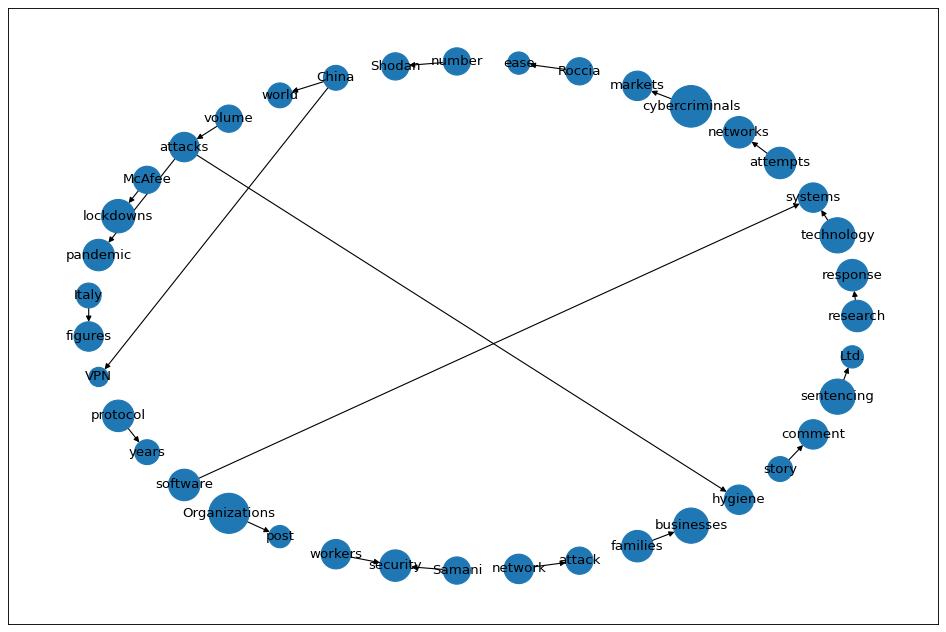

In [44]:
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)

plt.tight_layout()

node_size = [100*len(i) for i in nodes]
pos = nx.circular_layout(graph_ex)
nx.draw_networkx(graph_ex, pos, arrows = True, node_size = node_size, with_labels = True)
plt.savefig("../output/images/dg_ex.png", format="PNG")

plt.show()